In [304]:
import pandas as pd
import numpy as np
import json
import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [305]:
df = pd.read_csv("lyrics.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [306]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [307]:
df.reset_index(drop=True, inplace=True)

In [308]:
song_lyrics = df['lyrics']

In [309]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("([a-z])([A-Z])", " \\1", str(song_lyrics[i])).strip()
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", "", str(song_lyrics[i]))
    song_lyrics[i] = re.sub(r"\s*{.*}\s*", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(' +', ' ', str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].lower()

In [310]:
len(song_lyrics)

66

In [311]:
df.loc[35, "lyrics"]

'greaz erue, ayi\'m tryna get paid, take money, cash cheque sou see the set, that\'s lash, that\'s de xoung c, young shorty, milkavell ihite bricks, true religion, on the telly, it\'s m eiz got the house full of freak shat\'s why i haven\'t been around for a wee k\'m getting pounds in my slee p\'m at the top of the mountain, it\'s pea kring it back before the villai n had a life, real talk, true religio nt\'s in the blood, in the genes, in the stitchin galked in, no weapon, made a killin gongue kissing pretty wome new ihone \'cause i\'m done with all the bitchin gryna be in my positio neep my shades on \'cause they tryna see the visionshe tell me, "badman, see, i need your love, see, i need your love"mi need you close to me, me, i tell her say me, oh, stay on the roa dad energy stay far away, make it stay far awa yust give me love for the night, give me love for the night, gyal, waste no time'

In [286]:
df['lyrics'] = song_lyrics

In [287]:
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += list("I")

In [288]:
flat_lyrics = " ".join(df['lyrics'].values)

In [289]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_lyrics = tokenizer.tokenize(flat_lyrics)

In [290]:
lyrics_no_stop_words = [word for word in tokenized_lyrics if word not in stop_words]

In [291]:
import matplotlib.pyplot as plt

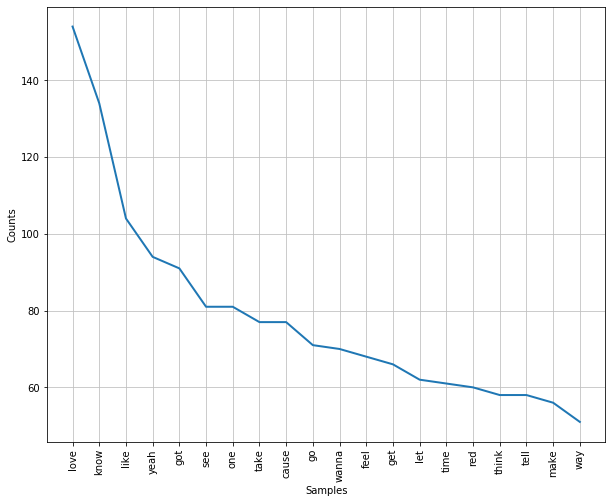

In [292]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(lyrics_no_stop_words).plot(20)
plt.show()

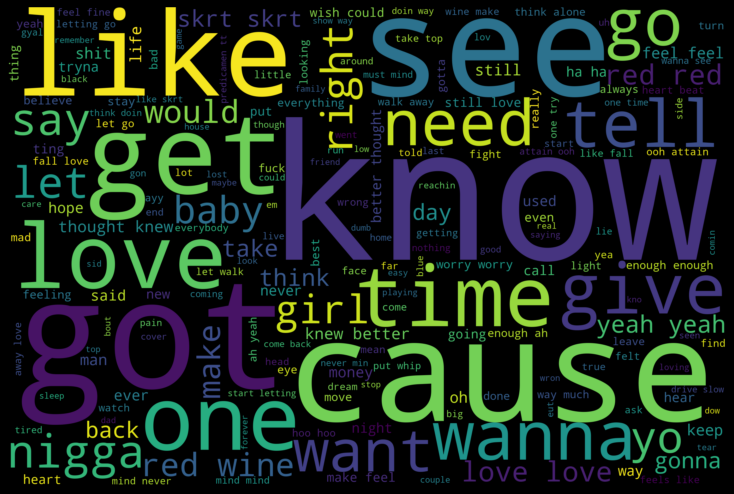

In [293]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(" ".join(lyrics_no_stop_words))

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [294]:
flat_lyrics = " ".join(df['lyrics'].values)

In [295]:
sid = SentimentIntensityAnalyzer()

In [296]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [297]:
df.head(60)

,track_name,artist,lyrics,neg,neu,pos,compound
0,Problems In Us,Col3trane,i couldn't believe that you would cal lnother ...,0.231,0.684,0.085,-0.9659
1,New Shapes,Diplo,you don't show me no sign of your innocent sid...,0.027,0.732,0.241,0.9901
2,Throwaway,SG Lewis,sometimes i know what's right for me and i'll...,0.028,0.836,0.135,0.9761
3,Skip,SuperParka,i will not always be your friend tell yourself...,0.096,0.757,0.147,0.6535
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,"don't wanna see you by yourself, by yourself ...",0.036,0.827,0.137,0.9893
5,Walk Away,DRAMA,walk away someday you’re gonna wake up you’ll ...,0.014,0.478,0.508,0.9996
6,Candid,Kllo,"talk with friends 'round me, don't talk with ...",0.063,0.859,0.077,0.8908
7,count on,Shallou,wait we found a place safe all on our own we'...,0.000,0.954,0.046,0.7757
8,Location (feat. Burna Boy),Dave,jae5 if you send me the location then i'll be...,0.106,0.743,0.151,0.9894
9,Feel It (feat. Theophilus London),Octavian,"you must be out of your mind, must be out of ...",0.068,0.859,0.072,0.3939


In [48]:
sample_tfidf = TfidfVectorizer(lowercase=True,
                              stop_words=stop_words,
                              tokenizer=tokenizer.tokenize,
                              min_df=1)

In [49]:
sample_sparse = sample_tfidf.fit_transform(song_lyrics)

In [50]:
sample_exp = pd.DataFrame(sample_sparse.toarray(), 
                        columns=sample_tfidf.get_feature_names())

sample_exp.head()

,aand,abloh,absurd,academy,accept,accepted,access,achieve,achieving,acrobat,...,yo,york,young,youthful,yuh,yumi,yungen,zing,zones,zoom
0,0.0,0.0,0.02173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
